In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plt
import plotly.express as px
import seaborn as sns
import math
import ast
import os, re, time
from sklearn import metrics
from sklearn import preprocessing


In [156]:
# данные для работы с уже объединенной загруженной на ПК базой(данные для использования DS на Kaggle удалены)
train_data = pd.read_csv('data/hotels.csv')
train_data.head(5)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [65]:
# выведем информацию о таблице
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Приведем столбец в удобный для работы формат

In [157]:
train_data['review_year'] = pd.to_datetime(train_data['review_date'])

Проверим на наличие пропусков и дубликатов. При наличии проведем работу по устранению 

In [158]:
columns_with_null = (train_data.isnull().mean()*100).sort_values(ascending=False)
columns_with_null

lng                                           0.63288
lat                                           0.63288
hotel_address                                 0.00000
additional_number_of_scoring                  0.00000
days_since_review                             0.00000
tags                                          0.00000
reviewer_score                                0.00000
total_number_of_reviews_reviewer_has_given    0.00000
review_total_positive_word_counts             0.00000
positive_review                               0.00000
total_number_of_reviews                       0.00000
review_total_negative_word_counts             0.00000
negative_review                               0.00000
reviewer_nationality                          0.00000
hotel_name                                    0.00000
average_score                                 0.00000
review_date                                   0.00000
review_year                                   0.00000
dtype: float64

In [159]:
duplicateRows = train_data[train_data.duplicated ()]
duplicateRows

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,review_year
21413,9 Rue Sainte Beuve 6th arr 75006 Paris France,22,9/27/2015,8.9,Hotel Le Sainte Beuve,Costa Rica,No Negative,0,143,Ir s a lovely boutique hotel full of Parisian...,53,4,10.0,"[' Leisure trip ', ' Family with older childre...",676 day,48.843900,2.329486,2015-09-27
53110,7 rue Casimir Delavigne 6th arr 75006 Paris Fr...,44,9/25/2016,9.0,H tel Baume,Lebanon,nothing at all,4,253,bed was great staff are wonderful location ve...,10,1,10.0,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",312 day,48.850152,2.339278,2016-09-25
54461,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,8/2/2016,7.9,H tel Concorde Montparnasse,Israel,The room to far from elevator,7,2515,Staff very nice and helpful Breakfast was per...,17,2,8.3,"[' Couple ', ' Classic Twin Room ', ' Stayed 3...",366 day,48.838108,2.318669,2016-08-02
56542,7 rue Casimir Delavigne 6th arr 75006 Paris Fr...,44,7/2/2017,9.0,H tel Baume,Romania,Breakfast was a huge joke It was the worst po...,19,253,Room was great nice and spacious appartment f...,14,7,7.9,"[' Leisure trip ', ' Family with young childre...",32 days,48.850152,2.339278,2017-07-02
65789,7 rue Casimir Delavigne 6th arr 75006 Paris Fr...,44,8/11/2015,9.0,H tel Baume,United Kingdom,No Negative,0,253,Friendly reception staff clean bathroom and l...,11,1,10.0,"[' Leisure trip ', ' Couple ', ' Superior Doub...",723 day,48.850152,2.339278,2015-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383104,7 rue Casimir Delavigne 6th arr 75006 Paris Fr...,44,11/3/2015,9.0,H tel Baume,United States of America,Rooms are very small,6,253,Location is excellent and staff is very frien...,10,1,8.3,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",639 day,48.850152,2.339278,2015-11-03
383183,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,7/28/2016,7.9,H tel Concorde Montparnasse,France,A bit noisy old fashion At almost 20 the brea...,18,2515,Convenient if one arrives departs from the Mo...,10,48,6.7,"[' Business trip ', ' Solo traveler ', ' Class...",371 day,48.838108,2.318669,2016-07-28
383798,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,5/15/2017,7.9,H tel Concorde Montparnasse,United Kingdom,twice spoken to staff to replace the coffee w...,24,2515,Tea making facilities not in the room only co...,11,2,7.9,"[' Leisure trip ', ' Couple ', ' Superior Doub...",80 days,48.838108,2.318669,2017-05-15
384118,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,10/12/2015,7.9,H tel Concorde Montparnasse,Australia,No great restaurants within a short walk but ...,12,2515,The Hotel was wonderfully p laced for us to a...,44,24,10.0,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",661 day,48.838108,2.318669,2015-10-12


In [160]:
train_data = train_data.drop_duplicates()
mask = train_data.duplicated()
train_data_duplicates = train_data[mask]

In [161]:
train_data['days_since_review'] = train_data['days_since_review'].apply(lambda x: int(x.split(' ')[0]))

In [162]:
train_data['review_year'] = pd.to_datetime(train_data['review_date']).dt.year
train_data['review_quarter'] = pd.to_datetime(train_data['review_date']).dt.quarter

In [163]:
train_data['review_quarter'].value_counts()

3    106724
2     99073
1     91092
4     89607
Name: review_quarter, dtype: int64

Выведем 25 стран, граждане которых любят путешествовать. Потом разобьем их на группы по расовым признакам, особенностям культуры и менталитета. Потом создадим новые признаки.

In [164]:
top25_countries = train_data['reviewer_nationality'].value_counts()[:25]
top25_countries 

 United Kingdom               183952
 United States of America      26494
 Australia                     16216
 Ireland                       11119
 United Arab Emirates           7612
 Saudi Arabia                   6716
 Netherlands                    6598
 Switzerland                    6492
 Canada                         5977
 Germany                        5951
 France                         5524
 Israel                         4912
 Italy                          4561
 Belgium                        4525
 Turkey                         4102
 Kuwait                         3700
 Spain                          3527
 Romania                        3422
 Russia                         2951
 South Africa                   2887
 China                          2562
 Sweden                         2560
 India                          2556
 Greece                         2531
 New Zealand                    2443
Name: reviewer_nationality, dtype: int64

Нагляднее цифр соотношение и разброс в количестве туристов виден на графике

In [165]:
import matplotlib.pyplot as plt

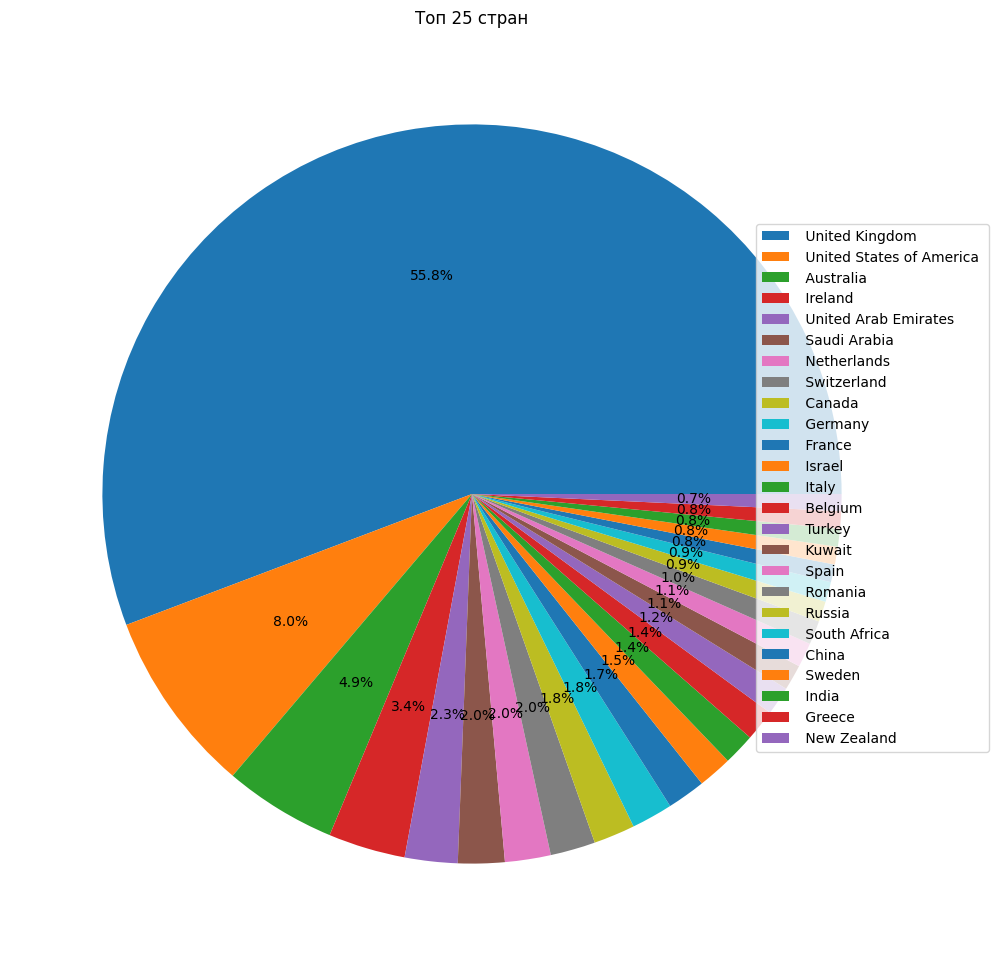

In [166]:
fig, ax = plt.subplots(figsize = (12, 12))

ax.pie(
    top25_countries,
    autopct='%.1f%%',
    explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
)
fig.patch.set_facecolor('white')
ax.set_title('Топ 25 стран')
ax.legend(loc='upper left', labels=top25_countries.index, bbox_to_anchor=(0.8, 0.8))
plt.show();

In [167]:
train_data['reviewer_nationality'] = train_data['reviewer_nationality'].apply(lambda x: x if x in top25_countries.index else 'other')

In [168]:
Europe = ['United Kingdom', 'France', 'Switzerland', 'Sweden', 'Turkey', 'Netherlands', 'Italy', 'Ireland', 'Germany','Israel','Spain', 'Romania', 'Belgium', 'Russia', 'Greece']
Asia = ['China', 'India']
USA_and_South_America = ['United States of America', 'Canada']
Middle_East = ['United Arab Emirates', 'Saudi Arabia', 'Kuwait']
Africa = ['South Africa']
Australia_Oceania_Carribbean = ['Australia', 'New Zealand']

In [169]:
train_data['Europe'] = train_data['reviewer_nationality'].apply(
    lambda x: 1 if (Europe[0] in x or
                    Europe[1] in x or
                    Europe[2] in x or
                    Europe[3] in x or
                    Europe[4] in x or
                    Europe[5] in x or
                    Europe[6] in x or
                    Europe[7] in x or
                    Europe[8] in x or
                    Europe[9] in x or
                    Europe[10] in x or
                    Europe[11] in x or
                    Europe[12] in x or
                    Europe[13] in x or
                    Europe[14] in x)  else 0)

train_data['Asia'] = train_data['reviewer_nationality'].apply(
    lambda x: 1 if (Asia[0] in x or
                    Asia[1] in x) else 0)

train_data['USA_and_South_America'] = train_data['reviewer_nationality'].apply(
    lambda x: 1 if (USA_and_South_America[0] in x or
                    USA_and_South_America[1] in x) else 0)

train_data['Middle_East'] = train_data['reviewer_nationality'].apply(
    lambda x: 1 if (Middle_East[0] in x or
                    Middle_East[1] in x or 
                    Middle_East[2] in x) else 0)

train_data['Africa'] = train_data['reviewer_nationality'].apply(
    lambda x: 1 if (Africa[0] in x ) else 0)
        
train_data['Australia_Oceania_Carribbean'] = train_data['reviewer_nationality'].apply(
    lambda x: 1 if (Australia_Oceania_Carribbean[0] in x or
                    Australia_Oceania_Carribbean[1] in x ) else 0)         
                                     


Теперь поработаем с тэгами: выберем и на их основе создадим новые признаки.

*При работе с отзывами была проведена работа вручную. Позже результаты были сравнены с результатами отбора спецмодулем, что показало почти одинаковые результаты.Поэтому были оставлены первоначальные.

In [170]:
positive_generally = ['hotel','everything', 'all','location', 'central', 'about', 'metro', 'close', 'station', 'bus', 'airport', 'nearby', 'near', 'center', 'museum', 'boutique', 'centre','distance', 'place', 'theatre', 'position', 'areas' 'proximity', 'situated', 'attractions', 'sights', 'sightseeing', 'locations','view', 'area', 'spa', 'lobby', 'lounge', 'gym', 'windows', 'swimming', 'pool', 'sauna', 'beach', 'hall', 'modern',  'decor', 'design', 'atmosphere',  'interior', 'terrace', 'shuttle', 'lighting', 'light', 'excellent', 'great', 'perfect', 'nice' ]
positive_staff = ['staff', 'friendly', 'helpful', 'service', 'staffs', 'attentive', 'experience', 'accommodating', 'courteous', 'friendliness', 'personnel', 'manager', 'reception', 'receptionist','stuff', 'concierge']
positive_room = ['room', 'equipped','comfortable', 'clean', 'bed', 'rooms', 'bathroom', 'shower', 'comfy', 'wifi', 'beds', 'pillows','bath', 'tv', 'window', 'bedroom', 'towels', 'wi', 'fi', 'internet', 'fridge', 'bathrooms', 'toilet', 'suite', 'kettle', 'linen', 'furniture', 'conditioning', 'toiletries', 'connection', 'confortable', 'cosy', 'cleaned', 'minibar', 'iron', 'charge', 'bedrooms', 'bedding','cleaning', 'cleanliness']
positive_food = ['fresh','delicious', 'breakfast', 'restaurants', 'bar', 'buffet', 'tea', 'food', 'restaurant', 'coffee', 'drinks', 'dinner', 'tasty', 'wine', 'cocktails', 'eggs', 'champagne', 'snacks', 'nespresso', 'kitchen', 'cookies', 'menu', 'meal', 'cake', 'breakfasts', 'chocolate', 'pub', 'dining', 'croissants', 'chocolates', 'juice', 'cocktail']
positive_price = ['price', 'money', 'paid','cheap', 'available']

In [171]:
train_data['positive_generally'] = train_data['positive_review'].apply(
    lambda x: 1 if (positive_generally[0] in x.split(sep=' ') or
                    positive_generally[1] in x.split(sep=' ') or 
                    positive_generally[2] in x.split(sep=' ') or
                    positive_generally[3] in x.split(sep=' ') or
                    positive_generally[4] in x.split(sep=' ') or
                    positive_generally[5] in x.split(sep=' ') or
                    positive_generally[6] in x.split(sep=' ') or
                    positive_generally[7] in x.split(sep=' ') or
                    positive_generally[8] in x.split(sep=' ') or
                    positive_generally[9] in x.split(sep=' ') or
                    positive_generally[10] in x.split(sep=' ') or
                    positive_generally[11] in x.split(sep=' ') or
                    positive_generally[12] in x.split(sep=' ') or
                    positive_generally[13] in x.split(sep=' ') or
                    positive_generally[14] in x.split(sep=' ') or
                    positive_generally[15] in x.split(sep=' ') or
                    positive_generally[16] in x.split(sep=' ') or
                    positive_generally[17] in x.split(sep=' ') or
                    positive_generally[18] in x.split(sep=' ') or
                    positive_generally[19] in x.split(sep=' ') or
                    positive_generally[20] in x.split(sep=' ') or
                    positive_generally[21] in x.split(sep=' ') or
                    positive_generally[22] in x.split(sep=' ') or
                    positive_generally[23] in x.split(sep=' ') or
                    positive_generally[24] in x.split(sep=' ') or
                    positive_generally[25] in x.split(sep=' ') or
                    positive_generally[26] in x.split(sep=' ') or
                    positive_generally[27] in x.split(sep=' ') or
                    positive_generally[28] in x.split(sep=' ') or
                    positive_generally[29] in x.split(sep=' ') or
                    positive_generally[30] in x.split(sep=' ') or
                    positive_generally[31] in x.split(sep=' ') or
                    positive_generally[32] in x.split(sep=' ') or
                    positive_generally[33] in x.split(sep=' ') or
                    positive_generally[34] in x.split(sep=' ') or
                    positive_generally[35] in x.split(sep=' ') or
                    positive_generally[36] in x.split(sep=' ') or
                    positive_generally[37] in x.split(sep=' ') or
                    positive_generally[38] in x.split(sep=' ') or
                    positive_generally[39] in x.split(sep=' ') or
                    positive_generally[40] in x.split(sep=' ') or
                    positive_generally[41] in x.split(sep=' ') or
                    positive_generally[42] in x.split(sep=' ') or
                    positive_generally[43] in x.split(sep=' ') or
                    positive_generally[44] in x.split(sep=' ') or
                    positive_generally[45] in x.split(sep=' ') or
                    positive_generally[46] in x.split(sep=' ') or
                    positive_generally[47] in x.split(sep=' ') or
                    positive_generally[48] in x.split(sep=' ') or
                    positive_generally[49] in x.split(sep=' ') or
                    positive_generally[50] in x.split(sep=' ') or
                    positive_generally[51] in x.split(sep=' ') ) else 0)       
                                        
train_data['positive_staff'] = train_data['positive_review'].apply(
    lambda x: 1 if (positive_staff[0] in x.split(sep=' ') or
                    positive_staff[1] in x.split(sep=' ') or
                    positive_staff[2] in x.split(sep=' ') or
                    positive_staff[3] in x.split(sep=' ') or
                    positive_staff[4] in x.split(sep=' ') or
                    positive_staff[5] in x.split(sep=' ') or
                    positive_staff[6] in x.split(sep=' ') or
                    positive_staff[7] in x.split(sep=' ') or
                    positive_staff[8] in x.split(sep=' ') or
                    positive_staff[9] in x.split(sep=' ') or
                    positive_staff[10] in x.split(sep=' ') or
                    positive_staff[11] in x.split(sep=' ') or
                    positive_staff[12] in x.split(sep=' ') or
                    positive_staff[13] in x.split(sep=' ') or
                    positive_staff[14] in x.split(sep=' ') or
                    positive_staff[15] in x.split(sep=' ') ) else 0)

train_data['positive_room'] = train_data['positive_review'].apply(
    lambda x: 1 if (positive_room[0] in x.split(sep=' ') or 
                    positive_room[1] in x.split(sep=' ') or 
                    positive_room[2] in x.split(sep=' ') or 
                    positive_room[3] in x.split(sep=' ') or 
                    positive_room[4] in x.split(sep=' ') or 
                    positive_room[5] in x.split(sep=' ') or 
                    positive_room[6] in x.split(sep=' ') or 
                    positive_room[7] in x.split(sep=' ') or 
                    positive_room[8] in x.split(sep=' ') or 
                    positive_room[9] in x.split(sep=' ') or 
                    positive_room[10] in x.split(sep=' ') or 
                    positive_room[11] in x.split(sep=' ') or 
                    positive_room[12] in x.split(sep=' ') or 
                    positive_room[13] in x.split(sep=' ') or 
                    positive_room[14] in x.split(sep=' ') or 
                    positive_room[15] in x.split(sep=' ') or 
                    positive_room[16] in x.split(sep=' ') or 
                    positive_room[17] in x.split(sep=' ') or 
                    positive_room[18] in x.split(sep=' ') or 
                    positive_room[19] in x.split(sep=' ') or 
                    positive_room[20] in x.split(sep=' ') or 
                    positive_room[21] in x.split(sep=' ') or 
                    positive_room[22] in x.split(sep=' ') or 
                    positive_room[23] in x.split(sep=' ') or 
                    positive_room[24] in x.split(sep=' ') or 
                    positive_room[25] in x.split(sep=' ') or 
                    positive_room[26] in x.split(sep=' ') or 
                    positive_room[27] in x.split(sep=' ') or 
                    positive_room[28] in x.split(sep=' ') or 
                    positive_room[29] in x.split(sep=' ') or 
                    positive_room[30] in x.split(sep=' ') or 
                    positive_room[31] in x.split(sep=' ') or 
                    positive_room[32] in x.split(sep=' ') or 
                    positive_room[33] in x.split(sep=' ') or 
                    positive_room[34] in x.split(sep=' ') or 
                    positive_room[35] in x.split(sep=' ') or 
                    positive_room[36] in x.split(sep=' ') or 
                    positive_room[37] in x.split(sep=' ') or 
                    positive_room[38] in x.split(sep=' ') or 
                    positive_room[39] in x.split(sep=' ')) else 0)

train_data['positive_food'] = train_data['positive_review'].apply(
    lambda x: 1 if (positive_food[0] in x.split(sep=' ') or
                    positive_food[1] in x.split(sep=' ') or
                    positive_food[2] in x.split(sep=' ') or
                    positive_food[3] in x.split(sep=' ') or
                    positive_food[4] in x.split(sep=' ') or
                    positive_food[5] in x.split(sep=' ') or
                    positive_food[6] in x.split(sep=' ') or
                    positive_food[7] in x.split(sep=' ') or
                    positive_food[8] in x.split(sep=' ') or
                    positive_food[9] in x.split(sep=' ') or
                    positive_food[10] in x.split(sep=' ') or
                    positive_food[11] in x.split(sep=' ') or
                    positive_food[12] in x.split(sep=' ') or
                    positive_food[13] in x.split(sep=' ') or
                    positive_food[14] in x.split(sep=' ') or
                    positive_food[15] in x.split(sep=' ') or
                    positive_food[16] in x.split(sep=' ') or
                    positive_food[17] in x.split(sep=' ') or
                    positive_food[18] in x.split(sep=' ') or
                    positive_food[19] in x.split(sep=' ') or
                    positive_food[20] in x.split(sep=' ') or
                    positive_food[21] in x.split(sep=' ') or
                    positive_food[22] in x.split(sep=' ') or
                    positive_food[23] in x.split(sep=' ') or
                    positive_food[24] in x.split(sep=' ') or
                    positive_food[25] in x.split(sep=' ') or
                    positive_food[26] in x.split(sep=' ') or
                    positive_food[27] in x.split(sep=' ') or
                    positive_food[28] in x.split(sep=' ') or
                    positive_food[29] in x.split(sep=' ') or
                    positive_food[30] in x.split(sep=' ') or
                    positive_food[31] in x.split(sep=' ')) else 0)

train_data['positive_price'] = train_data['positive_review'].apply(
    lambda x: 1 if (positive_price[0] in x.split(sep=' ') or
                    positive_price[1] in x.split(sep=' ') or
                    positive_price[2] in x.split(sep=' ') or
                    positive_price[3] in x.split(sep=' ') or
                    positive_price[4] in x.split(sep=' ')) else 0)

In [80]:
negative_generally = ['negative', 'nothing', 'everything', 'about', 'area', 'location', 'far', 'walk', 'station', 'centre', 'park', 'center', 'metro', 'located', 'areas', 'noisy', 'noise', 'view', 'window', 'facilities', 'parking', 'pool', 'space', 'place', 'windows', 'smell', 'light','lobby', 'loud', 'elevator', 'gym', 'spa','lounge', 'lighting', 'swimming', 'corridor', 'lifts','smoke', 'ceiling','carpets','terrace', 'sauna','smelled', 'smelt', 'elevators', 'hall']
negative_staff = ['staff', 'reception', 'rude', 'experience', 'receptionist', 'manager', 'housekeeping', 'service', 'stuff', 'concierge', 'services', 'unfriendly', 'rude', 'stuffy']
negative_room = ['room', 'bathroom','bed','shower', 'bad', 'rooms', 'wifi', 'beds','bath','toilet', 'size', 'tiny','conditioning', 'uncomfortable', 'charge','bedroom','charged','pillows', 'towels', 'pillow', 'fridge', 'heating', 'sink', 'carpet', 'internet', 'kettle', 'suite', 'wifi', 'tv', 'connection', 'channels','iron', 'curtains', 'internet', 'tube','wi', 'fi', 'conditioner', 'balcony', 'towel', 'wardrobe', 'minibar', 'sheets', 'sofa', 'toiletries','soap','bathrooms', 'ventilation','tub', 'shampoo', 'furniture', 'charges', 'bathtub', 'bedrooms','clean', 'cleaning', 'cleaned', 'clear', 'cleanliness', 'dust', 'dusty', 'dirty', 'rubbish']
negative_food = ['breakfast','bar', 'coffee', 'food', 'tea', 'restaurant', 'drinks', 'menu', 'buffet','milk', 'eggs', 'dinner', 'restaurants', 'meal', 'dining', 'wine','bread','bacon','fruit', 'kitchen', 'egg', 'breakfasts', 'meals', 'bottle', 'drink']
negative_price = ['expensive', 'price', 'cost', 'cheap', 'prices', 'pricey','bill', 'cheaper', 'costs']

In [172]:
train_data['negative_generally'] = train_data['negative_review'].apply(
    lambda x: 1 if (negative_generally[0] in x.split(sep=' ') or
                    negative_generally[1] in x.split(sep=' ') or 
                    negative_generally[2] in x.split(sep=' ') or
                    negative_generally[3] in x.split(sep=' ') or
                    negative_generally[4] in x.split(sep=' ') or
                    negative_generally[5] in x.split(sep=' ') or
                    negative_generally[6] in x.split(sep=' ') or
                    negative_generally[7] in x.split(sep=' ') or
                    negative_generally[8] in x.split(sep=' ') or
                    negative_generally[9] in x.split(sep=' ') or
                    negative_generally[10] in x.split(sep=' ') or
                    negative_generally[11] in x.split(sep=' ') or
                    negative_generally[12] in x.split(sep=' ') or
                    negative_generally[13] in x.split(sep=' ') or
                    negative_generally[14] in x.split(sep=' ') or
                    negative_generally[15] in x.split(sep=' ') or
                    negative_generally[16] in x.split(sep=' ') or
                    negative_generally[17] in x.split(sep=' ') or
                    negative_generally[18] in x.split(sep=' ') or
                    negative_generally[19] in x.split(sep=' ') or
                    negative_generally[20] in x.split(sep=' ') or
                    negative_generally[21] in x.split(sep=' ') or
                    negative_generally[22] in x.split(sep=' ') or
                    negative_generally[23] in x.split(sep=' ') or
                    negative_generally[24] in x.split(sep=' ') or
                    negative_generally[25] in x.split(sep=' ') or
                    negative_generally[26] in x.split(sep=' ') or
                    negative_generally[27] in x.split(sep=' ') or
                    negative_generally[28] in x.split(sep=' ') or
                    negative_generally[29] in x.split(sep=' ') or
                    negative_generally[30] in x.split(sep=' ') or
                    negative_generally[31] in x.split(sep=' ') or
                    negative_generally[32] in x.split(sep=' ') or
                    negative_generally[33] in x.split(sep=' ') or
                    negative_generally[34] in x.split(sep=' ') or
                    negative_generally[35] in x.split(sep=' ') or
                    negative_generally[36] in x.split(sep=' ') or
                    negative_generally[37] in x.split(sep=' ') or
                    negative_generally[38] in x.split(sep=' ') or
                    negative_generally[39] in x.split(sep=' ') or
                    negative_generally[40] in x.split(sep=' ') or
                    negative_generally[41] in x.split(sep=' ') or
                    negative_generally[42] in x.split(sep=' ') or
                    negative_generally[43] in x.split(sep=' ') or
                    negative_generally[44] in x.split(sep=' ') or
                    negative_generally[45] in x.split(sep=' ') ) else 0)       
                                        
train_data['negative_staff'] = train_data['negative_review'].apply(
    lambda x: 1 if (negative_staff[0] in x.split(sep=' ') or
                    negative_staff[1] in x.split(sep=' ') or
                    negative_staff[2] in x.split(sep=' ') or
                    negative_staff[3] in x.split(sep=' ') or
                    negative_staff[4] in x.split(sep=' ') or
                    negative_staff[5] in x.split(sep=' ') or
                    negative_staff[6] in x.split(sep=' ') or
                    negative_staff[7] in x.split(sep=' ') or
                    negative_staff[8] in x.split(sep=' ') or
                    negative_staff[9] in x.split(sep=' ') or
                    negative_staff[10] in x.split(sep=' ') or
                    negative_staff[11] in x.split(sep=' ') or
                    negative_staff[12] in x.split(sep=' ') or
                    negative_staff[13] in x.split(sep=' ')) else 0)

train_data['negative_room'] = train_data['negative_review'].apply(
    lambda x: 1 if (negative_room[0] in x.split(sep=' ') or 
                    negative_room[1] in x.split(sep=' ') or 
                    negative_room[2] in x.split(sep=' ') or 
                    negative_room[3] in x.split(sep=' ') or 
                    negative_room[4] in x.split(sep=' ') or 
                    negative_room[5] in x.split(sep=' ') or 
                    negative_room[6] in x.split(sep=' ') or 
                    negative_room[7] in x.split(sep=' ') or 
                    negative_room[8] in x.split(sep=' ') or 
                    negative_room[9] in x.split(sep=' ') or 
                    negative_room[10] in x.split(sep=' ') or 
                    negative_room[11] in x.split(sep=' ') or 
                    negative_room[12] in x.split(sep=' ') or 
                    negative_room[13] in x.split(sep=' ') or 
                    negative_room[14] in x.split(sep=' ') or 
                    negative_room[15] in x.split(sep=' ') or 
                    negative_room[16] in x.split(sep=' ') or 
                    negative_room[17] in x.split(sep=' ') or 
                    negative_room[18] in x.split(sep=' ') or 
                    negative_room[19] in x.split(sep=' ') or 
                    negative_room[20] in x.split(sep=' ') or 
                    negative_room[21] in x.split(sep=' ') or 
                    negative_room[22] in x.split(sep=' ') or 
                    negative_room[23] in x.split(sep=' ') or 
                    negative_room[24] in x.split(sep=' ') or 
                    negative_room[25] in x.split(sep=' ') or 
                    negative_room[26] in x.split(sep=' ') or 
                    negative_room[27] in x.split(sep=' ') or 
                    negative_room[28] in x.split(sep=' ') or 
                    negative_room[29] in x.split(sep=' ') or 
                    negative_room[30] in x.split(sep=' ') or 
                    negative_room[31] in x.split(sep=' ') or 
                    negative_room[32] in x.split(sep=' ') or 
                    negative_room[33] in x.split(sep=' ') or 
                    negative_room[34] in x.split(sep=' ') or 
                    negative_room[35] in x.split(sep=' ') or 
                    negative_room[36] in x.split(sep=' ') or 
                    negative_room[37] in x.split(sep=' ') or 
                    negative_room[38] in x.split(sep=' ') or 
                    negative_room[39] in x.split(sep=' ') or 
                    negative_room[40] in x.split(sep=' ') or 
                    negative_room[41] in x.split(sep=' ') or 
                    negative_room[42] in x.split(sep=' ') or 
                    negative_room[43] in x.split(sep=' ') or 
                    negative_room[44] in x.split(sep=' ') or 
                    negative_room[45] in x.split(sep=' ') or 
                    negative_room[46] in x.split(sep=' ') or 
                    negative_room[47] in x.split(sep=' ') or 
                    negative_room[48] in x.split(sep=' ') or 
                    negative_room[49] in x.split(sep=' ') or 
                    negative_room[50] in x.split(sep=' ') or 
                    negative_room[51] in x.split(sep=' ') or 
                    negative_room[52] in x.split(sep=' ') or 
                    negative_room[53] in x.split(sep=' ') or 
                    negative_room[54] in x.split(sep=' ') or 
                    negative_room[55] in x.split(sep=' ') or 
                    negative_room[56] in x.split(sep=' ') or 
                    negative_room[57] in x.split(sep=' ') or 
                    negative_room[58] in x.split(sep=' ') or 
                    negative_room[59] in x.split(sep=' ') or 
                    negative_room[60] in x.split(sep=' ') or 
                    negative_room[61] in x.split(sep=' ') or 
                    negative_room[62] in x.split(sep=' ')) else 0)

train_data['negative_food'] = train_data['negative_review'].apply(
    lambda x: 1 if (negative_food[0] in x.split(sep=' ') or
                    negative_food[1] in x.split(sep=' ') or
                    negative_food[2] in x.split(sep=' ') or
                    negative_food[3] in x.split(sep=' ') or
                    negative_food[4] in x.split(sep=' ') or
                    negative_food[5] in x.split(sep=' ') or
                    negative_food[6] in x.split(sep=' ') or
                    negative_food[7] in x.split(sep=' ') or
                    negative_food[8] in x.split(sep=' ') or
                    negative_food[9] in x.split(sep=' ') or
                    negative_food[10] in x.split(sep=' ') or
                    negative_food[11] in x.split(sep=' ') or
                    negative_food[12] in x.split(sep=' ') or
                    negative_food[13] in x.split(sep=' ') or
                    negative_food[14] in x.split(sep=' ') or
                    negative_food[15] in x.split(sep=' ') or
                    negative_food[16] in x.split(sep=' ') or
                    negative_food[17] in x.split(sep=' ') or
                    negative_food[18] in x.split(sep=' ') or
                    negative_food[19] in x.split(sep=' ') or
                    negative_food[20] in x.split(sep=' ') or
                    negative_food[21] in x.split(sep=' ') or
                    negative_food[22] in x.split(sep=' ') or
                    negative_food[23] in x.split(sep=' ') or
                    negative_food[24] in x.split(sep=' ') ) else 0)

train_data['negative_price'] = train_data['negative_review'].apply(
    lambda x: 1 if (negative_price[0] in x.split(sep=' ') or
                    negative_price[1] in x.split(sep=' ') or
                    negative_price[2] in x.split(sep=' ') or
                    negative_price[3] in x.split(sep=' ') or
                    negative_price[4] in x.split(sep=' ') or
                    negative_price[5] in x.split(sep=' ') or
                    negative_price[6] in x.split(sep=' ') or
                    negative_price[7] in x.split(sep=' ') or
                    negative_price[8] in x.split(sep=' ')) else 0)

Теперь выделим из тэгов количество ночей, создадим на их основе признак.

In [174]:
num_night = [' Stayed 1 night ',' Stayed 2 nights ',' Stayed 3 nights ',' Stayed 4 nights ',' Stayed 5 nights ',' Stayed 6 nights ',\
             ' Stayed 7 nights ',' Stayed 8 nights ',' Stayed 9 nights ',' Stayed 10 nights ',' Stayed 11 nights ',\
             ' Stayed 12 nights ',' Stayed 13 nights ',' Stayed 14 nights ',' Stayed 15 nights ',' Stayed 16 nights ',' Stayed 17 nights ',\
              ' Stayed 18 nights ',' Stayed 19 nights ',' Stayed 20 nights ',' Stayed 21 nights ',' Stayed 22 nights ',' Stayed 23 nights ',\
             ' Stayed 24 nights ',' Stayed 25 nights ',' Stayed 26 nights ',' Stayed 27 nights ',' Stayed 28 nights ',' Stayed 29 nights ',' Stayed 30 nights ']

def get_night(x):
  for i in num_night:
    if i in x:
      return int(i.split(' ')[2])

train_data['nights'] = train_data['tags'].apply(get_night)

In [175]:
nights = train_data['nights']
train_data['nights'].value_counts().sort_values(ascending=False)

1.0     145296
2.0     100176
3.0      71940
4.0      35708
5.0      15592
6.0       7388
7.0       5541
8.0       1907
9.0        966
10.0       662
11.0       305
12.0       217
14.0       184
13.0       174
15.0        87
16.0        38
17.0        27
18.0        24
19.0        23
21.0        19
20.0        17
30.0        10
27.0        10
22.0         8
28.0         7
23.0         6
26.0         6
24.0         5
25.0         4
29.0         3
Name: nights, dtype: int64

Как видно из данных, самый популярный тур по продолжительности- на 1 ночь.

Проверим на пропуски и устраним это.

In [176]:
train_data['nights'].isnull().mean()
train_data['nights'] = train_data['nights'].fillna(1)

Следующие интересные признаки - "повод" для поездки (отдых или по делам). Создадим соответствующие признаки и проверим версию, что бОльшая часть поездок не связана с работой.

In [177]:
train_data['Leisure_trip'] = train_data['tags'].apply(lambda x: 1 if ' Leisure trip ' in x else 0)
train_data['Business_trip'] = train_data['tags'].apply(lambda x: 1 if ' Business trip ' in x else 0)

In [178]:
train_data['Leisure_trip'].value_counts().sort_values(ascending=False)

1    313353
0     73143
Name: Leisure_trip, dtype: int64

In [179]:
train_data['Business_trip'].value_counts().sort_values(ascending=False)

0    324562
1     61934
Name: Business_trip, dtype: int64

Действительно, отдых является основным поводом для поездки

Что еще в тэгах интересного? Так, еще можно выделить признаки по типу посетителей (клиентов, туристов и т.п.), по типам номеров, а также мобильный не обойти вниманием

In [180]:
def get_travelers(x):
  if ' Couple ' in x:
    return 'Couple'
  elif ' Solo traveler ' in x:
    return 'Solo traveler'
  elif ' Group ' in x:
    return 'Group'
  elif ' Family with young children ' in x:
    return 'Family with young children'
  elif ' Family with older children ' in x:
    return 'Family with older children'
  elif ' Travelers with friends ' in x:
    return 'Travelers with friends'       

train_data['Travelers_type'] = train_data['tags'].apply(get_travelers)

In [181]:
train_data['Travelers_type'].value_counts().sort_values(ascending=False)

Couple                        189046
Solo traveler                  81166
Group                          49057
Family with young children     45810
Family with older children     19787
Travelers with friends          1630
Name: Travelers_type, dtype: int64

Ожидаемый результат: на первом месте пары. Еще раз проверим на пропуски.

In [182]:
train_data['Travelers_type'].isnull().mean()

0.0

На типы номеров ушло немало времени: работа тоже проводилась вручную, т.к. надо было привести их к относительному стандарту, с учетом классификаций, принятых в разных странах(например, в Турции уникальные типы номеров)

In [183]:
lst_room = [' Twin Room ',' Double Room ',' Single ',' Queen ',' King Room ',' Triple ',' Suite ',\
            ' Studio ',' Family Room ',' Quadruple ',' 2 rooms ',' 3 rooms ',' Standard Room ',' Classic Room ',\
            ' Twin Guest Room',' Double Hilton Guestroom ',' Standard Room with 1 Double Bed ',' Standard Double ',\
            ' Double Deluxe Room ',' Studio Suite ',' King Hilton Guest Room ']

lst_room1 = [' Single ',' 1 room ']
lst_room2 = [' Twin Room ',' Double Room ',' 2 rooms ',' Standard Room ',' Classic Room ',' Twin Guest Room',\
             ' Double Hilton Guestroom ',' Standard Room with 1 Double Bed ',' Standard Double ']
lst_room3 = [' Triple ',' 3 rooms ']
lst_room4 = [' Quadruple ']
lst_room5 = [' Queen ']
lst_room6 = [' King Room ',' King Hilton Guest Room ']
lst_room7 = [' Suite ']
lst_room8 = [' Studio ',' Studio Suite ']

def get_room(x):
  for i in lst_room:
    if i in lst_room1 and i in x:
      return 'Single'
    if i in lst_room2 and i in x:
      return 'Double_Twin'
    if i in lst_room3 and i in x:
      return 'Triple'
    if i in lst_room4 and i in x:
      return 'Quadruple'
    if i in lst_room5 and i in x:
      return 'Queen'
    if i in lst_room6 and i in x:
      return 'King'
    if i in lst_room7 and i in x:
      return 'Suite'
    if i in lst_room8 and i in x:
      return 'Studio'      

train_data['room_type'] = train_data['tags'].apply(get_room)

In [184]:
train_data['room_type'].value_counts().sort_values(ascending=False)

Double_Twin    267696
Queen           22060
Single          19769
King            18670
Suite           12397
Triple           7613
Studio           3393
Quadruple        1363
Name: room_type, dtype: int64

Проверим снова на пропуски и заменим (при их наличии) самым распространенным типом

In [185]:
train_data['room_type'].isnull().mean()

0.0867667453220732

In [186]:
train_data['room_type'] = train_data['room_type'].fillna('Double_Twin')

In [187]:
train_data['with_pet'] = train_data['tags'].apply(lambda x: 1 if 'pet' in x else 0)
train_data['with_pet'].value_counts()

0    385451
1      1045
Name: with_pet, dtype: int64

In [188]:
train_data['with_mobile'] = train_data['tags'].apply(lambda x: 1 if ' Submitted from a mobile device ' in x else 0)
train_data['with_mobile'].value_counts()

1    230608
0    155888
Name: with_mobile, dtype: int64

Посмотрим в последний раз на состав нашей базы и удалим уже ненужные столбцы,а новые закодируем.

In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386496 non-null  object 
 1   additional_number_of_scoring                386496 non-null  int64  
 2   review_date                                 386496 non-null  object 
 3   average_score                               386496 non-null  float64
 4   hotel_name                                  386496 non-null  object 
 5   reviewer_nationality                        386496 non-null  object 
 6   negative_review                             386496 non-null  object 
 7   review_total_negative_word_counts           386496 non-null  int64  
 8   total_number_of_reviews                     386496 non-null  int64  
 9   positive_review                             386496 non-null  object 
 

In [189]:
train_data.drop(['hotel_address','review_date','hotel_name','reviewer_nationality','negative_review',\
             'positive_review','tags','lat','lng', 'review_year'], axis=1, inplace=True)

In [190]:
train_data = pd.get_dummies(train_data,columns=['review_quarter','room_type','Travelers_type'])

Проведем тесты на корреляцию двумя разными методами: Пирсона и Спирмана

In [191]:
import plotly.graph_objects as go
hotels_review = train_data[['additional_number_of_scoring','average_score','review_total_negative_word_counts',\
                        'total_number_of_reviews','review_total_positive_word_counts',\
                        'total_number_of_reviews_reviewer_has_given','reviewer_score']]

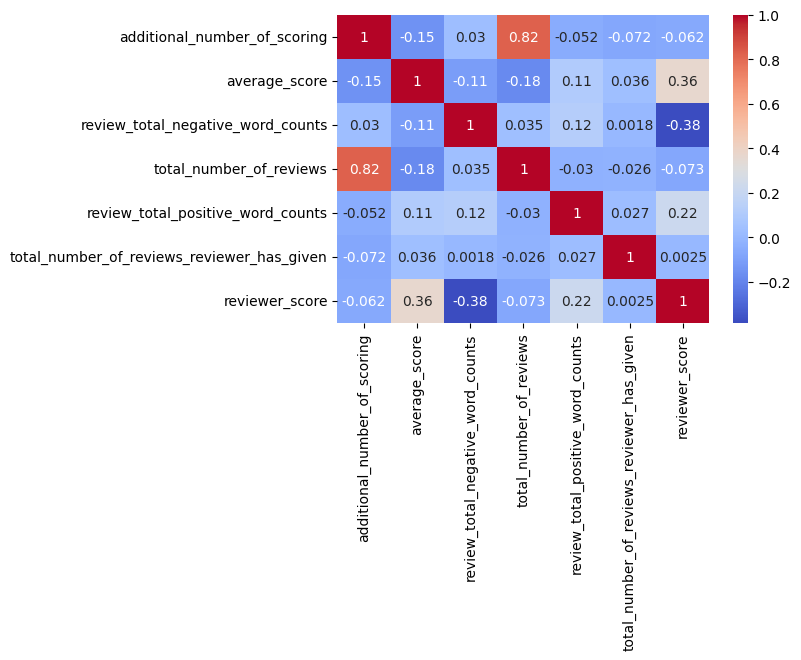

In [192]:
fig=plt.figure(figsize=(6,4))
sns.heatmap(hotels_review.corr(), cmap= 'coolwarm',annot=True);

Метод Пирсона на тепловой карте показал высокую взаимосвязь между двумя признаками: 'additional_number_of_scoring' и 'total_number_of_reviews' в 0,82 (что попадает в интервал 0,7-0,9).Проведем классическое построение версий путем обращения к методу Спирмана.

In [193]:
from scipy.stats import spearmanr

H0 = 'Нет связи между признаками'
H1 = 'Есть связь между признаками'
alpha = 0.05 

corr, p = spearmanr(train_data['additional_number_of_scoring'], train_data['total_number_of_reviews'])
print(f'correlation = {corr}, p = {round(p,2)}')

if p>alpha:
    print(f'{p} > {alpha}. {H0}')
else:
    print(f'{p} <= {alpha}. {H1}')

correlation = 0.8591688174949688, p = 0.0
0.0 <= 0.05. Есть связь между признаками


Метод Спирмана так же подтвердил наличие корреляции между этими признаками. Можно еще проверить правильность корреляции на положительность. 
Потом удалим один из сильнокоррелированных признаков:'additional_number_of_scoring' 

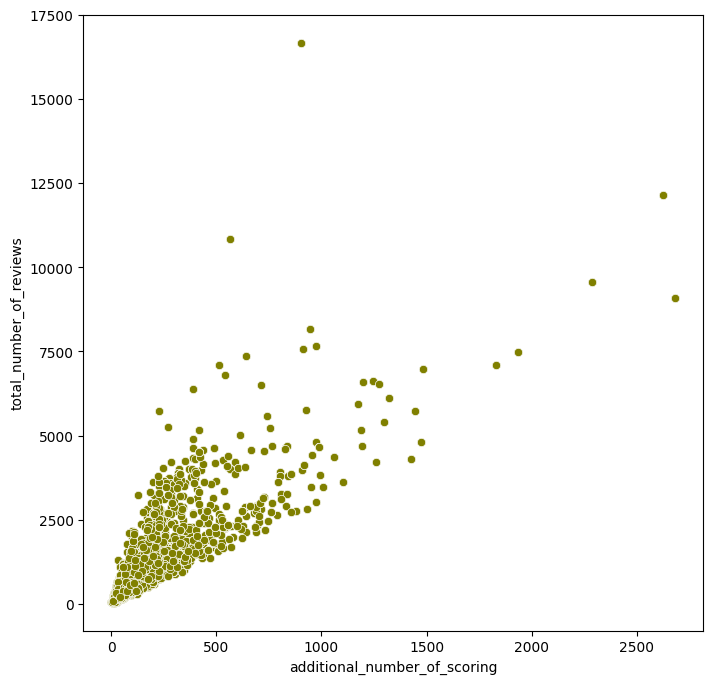

In [201]:
ax = plt.figure(figsize=(8,8))
sns.scatterplot(data=train_data, x= 'additional_number_of_scoring', y='total_number_of_reviews', color='olive');

Да, корреляция признаков положительная

In [202]:
train_data.drop(['additional_number_of_scoring'],axis=1,inplace=True)

In [203]:
from sklearn import preprocessing

Проверим на корреляцию новые "временные" признаки, признаки национальных групп, а также оставшихся признаков

In [138]:
hotels_time = train_data[['days_since_review','review_quarter_1','review_quarter_2','review_quarter_3','review_quarter_4']]


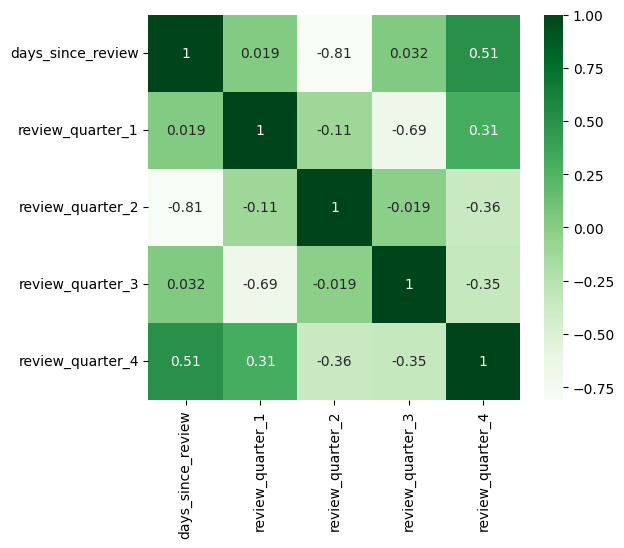

In [139]:
fig = plt.figure(figsize=(6,5))
sns.heatmap(hotels_time.corr(method='spearman'), cmap='Greens', annot=True);

In [141]:
reviewer_location = train_data[['Africa','USA_and_South_America','Asia', 'Europe','Australia_Oceania_Carribbean','Middle_East']]


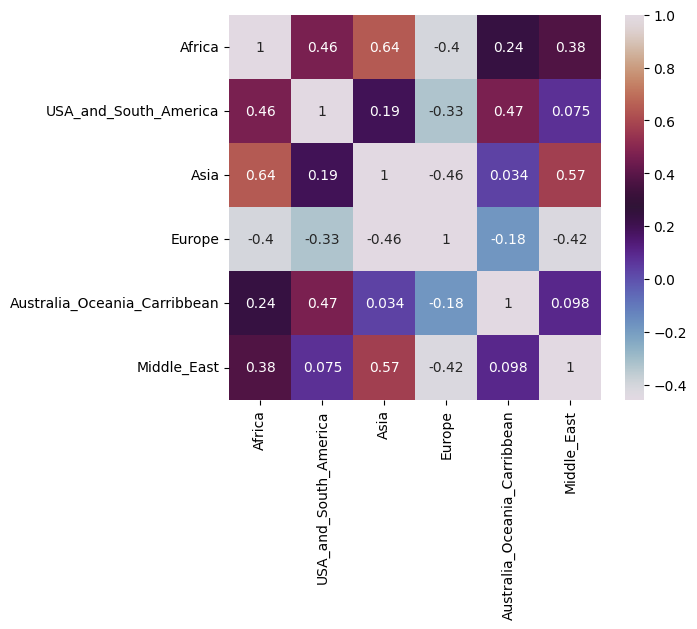

In [145]:
fig = plt.figure(figsize=(6,5))
sns.heatmap(reviewer_location.corr(method='spearman'), cmap='twilight', annot=True);  

In [151]:
hotel_tags = train_data[['Leisure_trip','with_pet','with_mobile', 'room_type_Double_Twin','room_type_King','room_type_Quadruple',\
                     'room_type_Queen','room_type_Studio','room_type_Suite','room_type_Triple','Travelers_type_Couple','Travelers_type_Family with older children','Travelers_type_Family with young children',\
                     'Travelers_type_Group','Travelers_type_Solo traveler','Travelers_type_Travelers with friends','nights']]


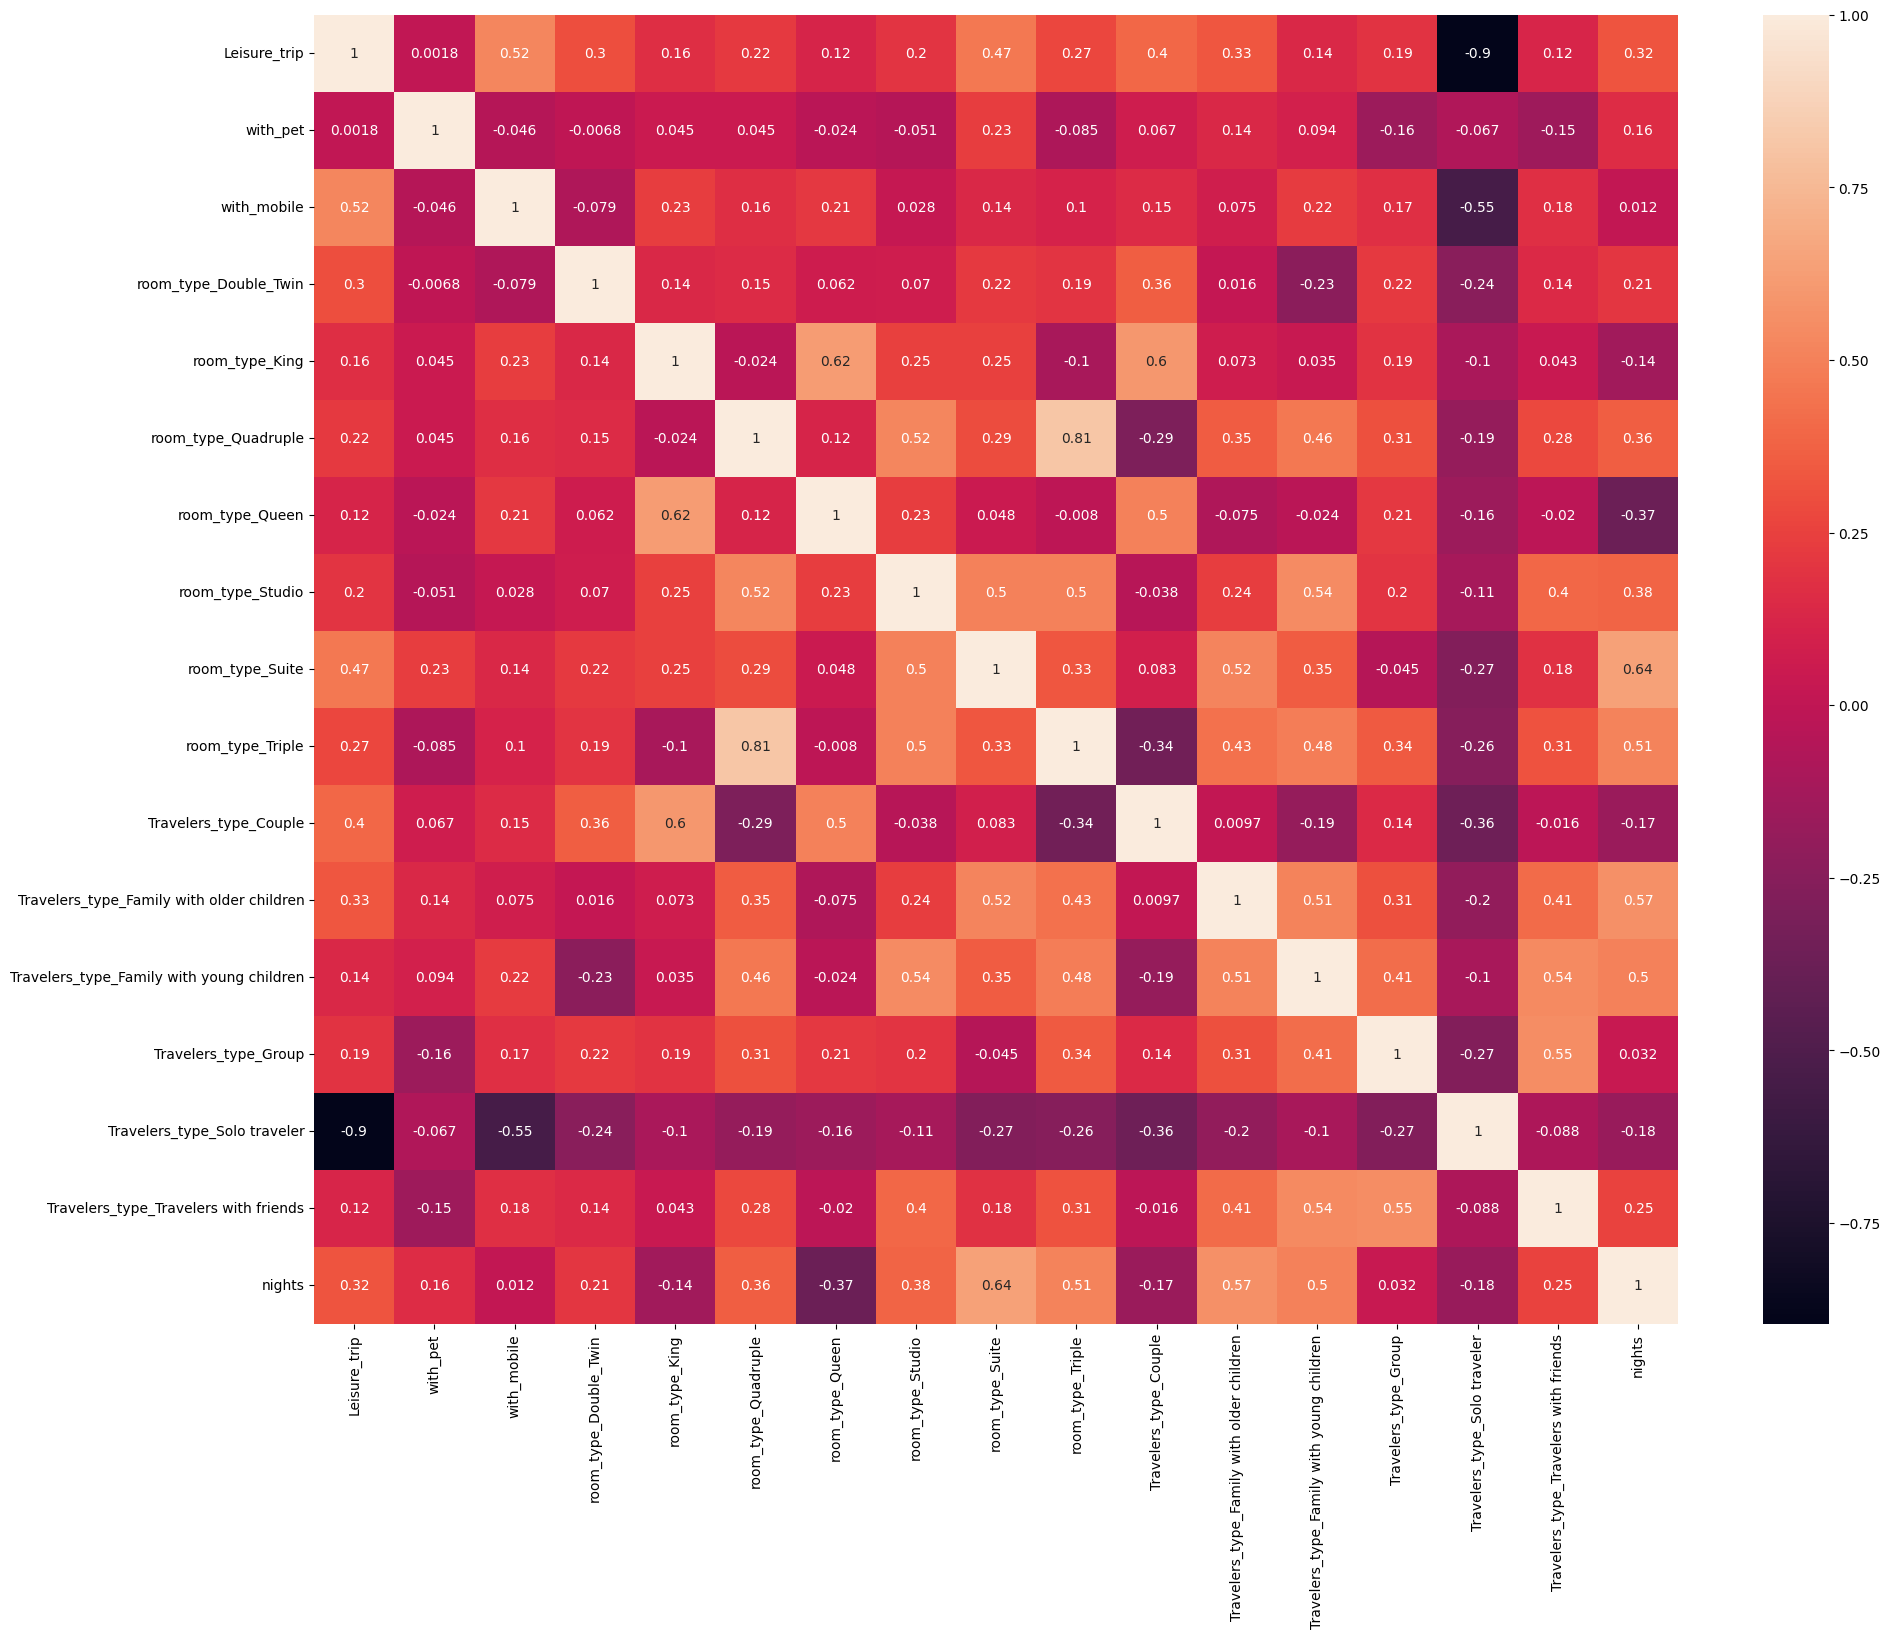

In [153]:
fig = plt.figure(figsize=(22,17))
sns.heatmap(hotel_tags.corr(method='spearman'),  annot=True);    

In [119]:
import plotly.express as px
train_data = train_data.corr()
fig = px.imshow(train_data, text_auto=True, aspect="auto",height=1400, width=1200,color_continuous_scale='RdBu_r')
fig.show();

Признаков мультиколлинеарности кроме уже выявленных двух признаков и не связанных друг с другом двух типов номеров не наблюдается. 
P.S. на общей корреляционной тепловой карте мультиколлениарности нет.Не знаю, почему "вылезла" сильная связь между типами номеров.

В последний раз проверим базу и перейдем к главному

In [109]:
train_data.isnull().mean()

average_score                                 0.0
review_total_negative_word_counts             0.0
total_number_of_reviews                       0.0
review_total_positive_word_counts             0.0
total_number_of_reviews_reviewer_has_given    0.0
reviewer_score                                0.0
days_since_review                             0.0
Europe                                        0.0
Asia                                          0.0
USA_and_South_America                         0.0
Middle_East                                   0.0
Africa                                        0.0
Australia_Oceania_Carribbean                  0.0
positive_generally                            0.0
positive_staff                                0.0
positive_room                                 0.0
positive_food                                 0.0
positive_price                                0.0
negative_generally                            0.0
negative_staff                                0.0


In [110]:
X = train_data.drop(['reviewer_score'], axis = 1)  
y = train_data['reviewer_score'] 

In [111]:
from sklearn.model_selection import train_test_split  

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [113]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               386496 non-null  float64
 1   review_total_negative_word_counts           386496 non-null  int64  
 2   total_number_of_reviews                     386496 non-null  int64  
 3   review_total_positive_word_counts           386496 non-null  int64  
 4   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 5   reviewer_score                              386496 non-null  float64
 6   days_since_review                           386496 non-null  int64  
 7   Europe                                      386496 non-null  int64  
 8   Asia                                        386496 non-null  int64  
 9   USA_and_South_America                       386496 non-null  int64  
 

Построим графики важности категориальных и числовых признаков. Можно удалить слабые признаки, но особого влияния на MAPE в нашей случае это не произвело (поэтому удаление на практике не производилось)

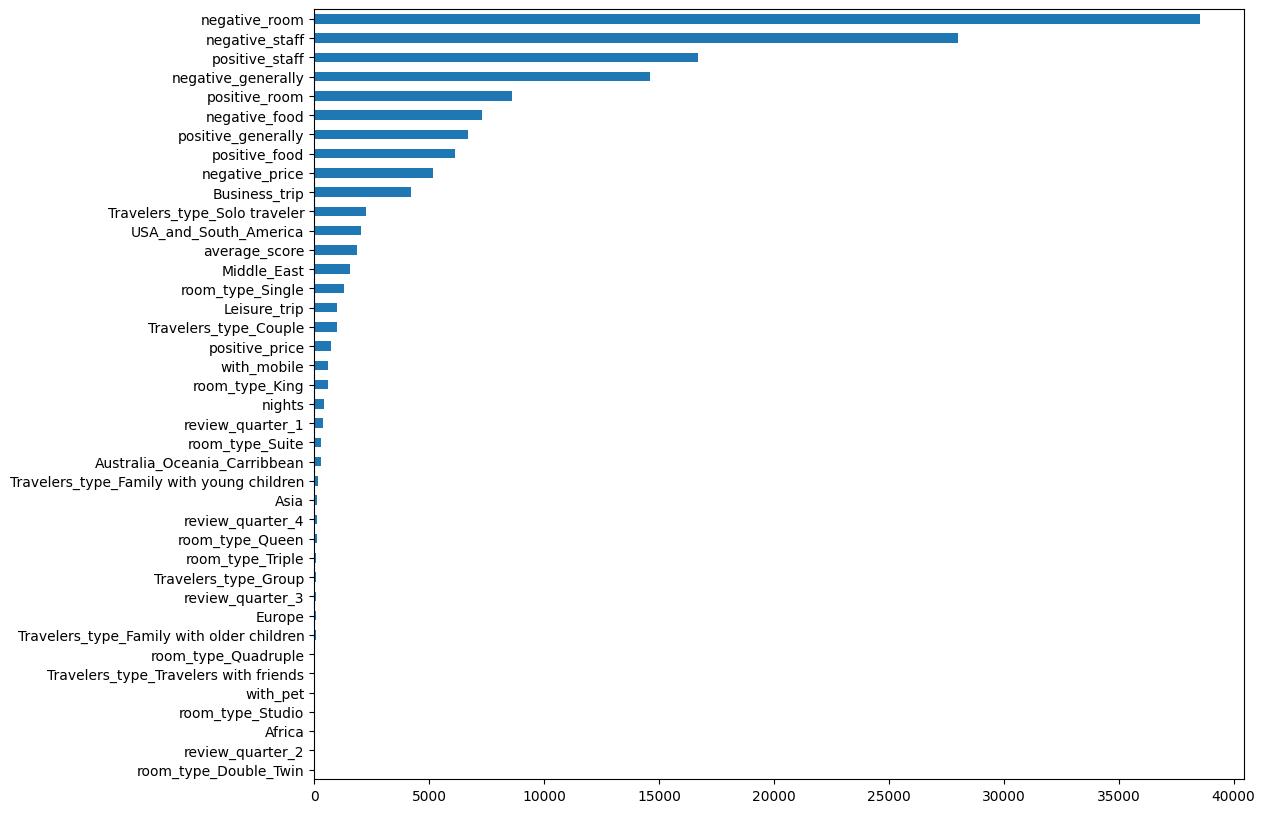

In [134]:
fig = plt.figure(figsize=(12,10))

cat_cols = ['average_score','positive_generally','positive_staff','positive_room', 'positive_food', 'with_pet','positive_price', 'negative_generally', 'negative_staff', 'negative_room',\
    'negative_food', 'negative_price', 'Leisure_trip','Business_trip', 'with_mobile','review_quarter_1','review_quarter_2','review_quarter_3',\
           'review_quarter_4','Africa','USA_and_South_America','Asia','Middle_East','Europe','Australia_Oceania_Carribbean','room_type_Double_Twin',\
           'room_type_King','room_type_Quadruple','room_type_Queen','room_type_Single','room_type_Studio','room_type_Suite',\
            'room_type_Triple','Travelers_type_Couple','Travelers_type_Family with older children','Travelers_type_Family with young children',\
            'Travelers_type_Group','Travelers_type_Solo traveler','Travelers_type_Travelers with friends','nights']


y=y.astype('int')

from sklearn.feature_selection import chi2 

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh'); 

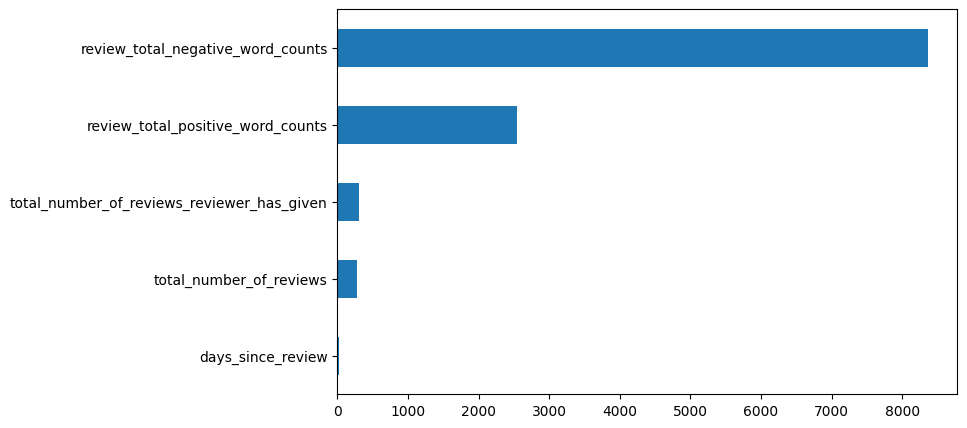

In [135]:
fig = plt.figure(figsize=(8,5))

num_cols = ['review_total_negative_word_counts','total_number_of_reviews','review_total_positive_word_counts',\
            'total_number_of_reviews_reviewer_has_given','days_since_review']


from sklearn.feature_selection import f_classif 

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh');     

In [116]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics 
  
regr = RandomForestRegressor(n_estimators=100)  
regr.fit(X_train, y_train)  
y_pred = regr.predict(X_test)  

In [117]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13184052619226544
